In [5]:
#pacotes estatísitcos e de tratamento de dados
import pandas as pd
import numpy as np
import scipy.stats as stt

from sklearn.preprocessing import LabelEncoder, StandardScaler

#pacotes gráficos
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
df_minerais = pd.read_csv('../Base de dados/csv/mineral_dataset.csv', header =0)

In [7]:
df_minerais.describe(include =  'all')

,Unnamed: 0,Name,Crystal Structure,Mohs Hardness,Diaphaneity,Specific Gravity,Optical,Refractive Index,Dispersion,Hydrogen,...,Acetate,Phosphate,Sulphate,Carbonate,Ammonium,Hydrated Water,count,Molar Mass,Molar Volume,Calculated Density
count,3112.000000,3112,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,...,3112.0,3112.0,3112.0,3112.0,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.00000
unique,NaN,3112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Abenakiite-(Ce),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1555.500000,NaN,0.677057,0.845925,0.405206,0.666800,0.701157,0.323626,0.000459,1.311375,...,0.0,0.0,0.0,0.0,0.002892,0.903920,19.755463,607.052968,0.110810,5.28411
std,898.501345,NaN,1.388575,1.844267,0.877966,1.481692,1.456768,0.678769,0.006851,3.643521,...,0.0,0.0,0.0,0.0,0.064578,2.654198,19.762060,673.908663,0.117827,2.86038
min,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,1.000000,1.007940,0.011030,0.07500
25%,777.750000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,8.000000,239.417117,0.044832,3.15475
50%,1555.500000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,15.000000,411.769265,0.078555,4.82150
75%,2333.250000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,25.000000,747.094885,0.134544,6.80450


In [8]:
df_minerais.isnull().sum()

Unnamed: 0            0
Name                  0
Crystal Structure     0
Mohs Hardness         0
Diaphaneity           0
                     ..
Hydrated Water        0
count                 0
Molar Mass            0
Molar Volume          0
Calculated Density    0
Length: 140, dtype: int64

In [9]:
df_minerais.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [10]:
encoder = LabelEncoder()
df_minerais['Name'] = encoder.fit_transform(df_minerais['Name'])

In [11]:
df_minerais.drop_duplicates(keep='first', inplace = True)

In [12]:
df_minerais.dropna(inplace=True)

In [13]:
df_minerais['Crystal Structure'] = df_minerais['Crystal Structure'].astype(int)

In [15]:
df_minerais['Crystal Structure'].unique()

array([5, 4, 0, 2, 3, 1, 6])

In [43]:
df_len = len(df_minerais)

for col in df_minerais.columns:
    if df_len != np.bincount(pd.to_numeric(df_minerais[col], errors='coerce').isnull()):
        print('OK')

In [44]:
df_minerais.describe()

,Name,Crystal Structure,Mohs Hardness,Diaphaneity,Specific Gravity,Optical,Refractive Index,Dispersion,Hydrogen,Helium,...,Acetate,Phosphate,Sulphate,Carbonate,Ammonium,Hydrated Water,count,Molar Mass,Molar Volume,Calculated Density
count,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,...,3112.0,3112.0,3112.0,3112.0,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.00000
mean,1555.500000,0.677057,0.845925,0.405206,0.666800,0.701157,0.323626,0.000459,1.311375,0.000321,...,0.0,0.0,0.0,0.0,0.002892,0.903920,19.755463,607.052968,0.110810,5.28411
std,898.501345,1.388575,1.844267,0.877966,1.481692,1.456768,0.678769,0.006851,3.643521,0.017926,...,0.0,0.0,0.0,0.0,0.064578,2.654198,19.762060,673.908663,0.117827,2.86038
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,1.000000,1.007940,0.011030,0.07500
25%,777.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,8.000000,239.417117,0.044832,3.15475
50%,1555.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,15.000000,411.769265,0.078555,4.82150
75%,2333.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,25.000000,747.094885,0.134544,6.80450
max,3111.000000,6.000000,9.500000,3.000000,9.593000,4.000000,3.383000,0.213000,48.000000,1.000000,...,0.0,0.0,0.0,0.0,2.000000,43.000000,385.000000,14241.839600,1.962209,13.98600


In [50]:
featuares = ['Crystal Structure', 'Mohs Hardness', 'Diaphaneity', 'Specific Gravity', 'Optical', 'Refractive Index', 'count', 'Molar Mass', 'Molar Volume', 'Calculated Density']

In [3]:
df_features = df_minerais[featuares]

NameError: name 'df_minerais' is not defined

/private/tmp/PKInstallSandbox.QZdpJd/tmp/ipykernel_35936/1838599568.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g = sns.distplot(v, ax=axs[index], color='darkcyan')
/private/tmp/PKInstallSandbox.QZdpJd/tmp/ipykernel_35936/1838599568.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g = sns.distplot(v, ax=axs[in

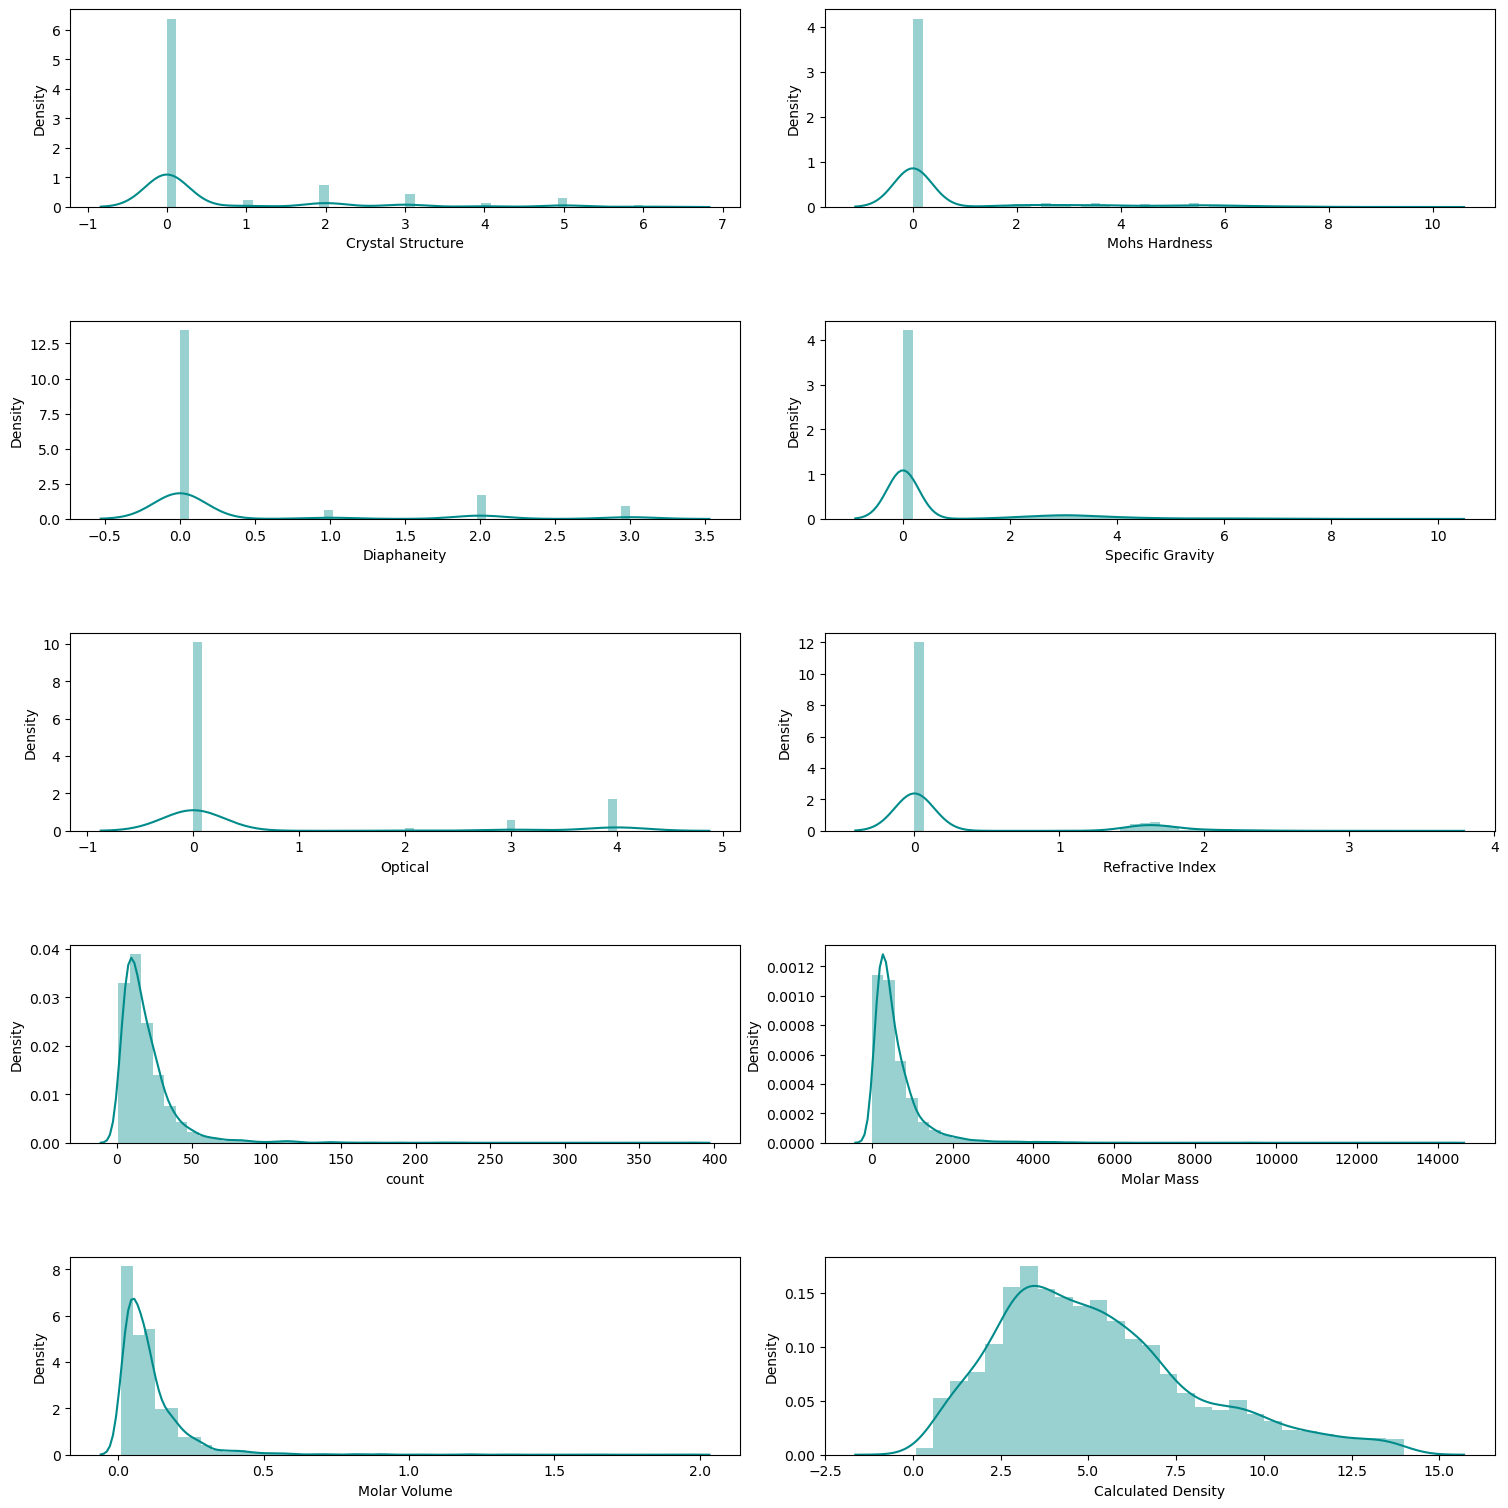

In [52]:
fig, axs = plt.subplots(ncols=2, nrows=5, figsize=(15, 15))
index = 0
axs = axs.flatten()
for k, v in df_features.items():
    g = sns.distplot(v, ax=axs[index], color='darkcyan')
    index += 1
plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad = 5.0)

In [55]:
df_features = df_features.loc[df_minerais['Mohs Hardness'] > 0]
df_features = df_features.loc[df_minerais['Diaphaneity'] > 0]
df_features = df_features.loc[df_minerais['Specific Gravity'] > 0]
df_features = df_features.loc[df_minerais['Refractive Index'] > 0]

In [2]:
df_feature['Crystal Structure'].unique()

NameError: name 'df_feature' is not defined

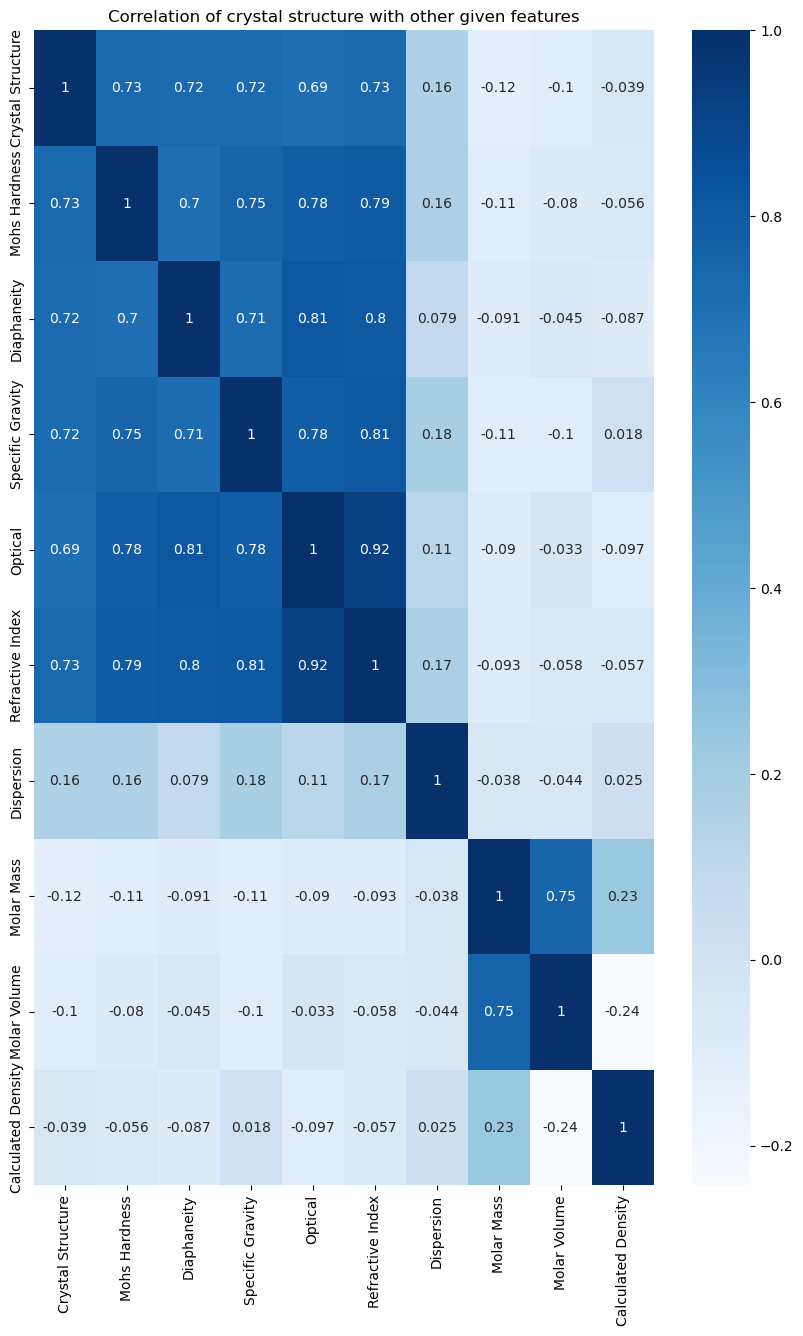

In [58]:
#Heatmap displaying correalation between each attributes
plt.figure(figsize=(10,15))
sns.heatmap(df_minerais[['Crystal Structure','Mohs Hardness','Diaphaneity','Specific Gravity','Optical','Refractive Index','Dispersion','Molar Mass','Molar Volume','Calculated Density']].corr(),annot=True,cmap='Blues');
plt.title('Correlation of crystal structure with other given features');
plt.show()

In [59]:
scaler = StandardScaler()
scaler.fit(df_features[featuares[1:]])
df_features[featuares[1:]] = scaler.transform(df_features[featuares[1:]])

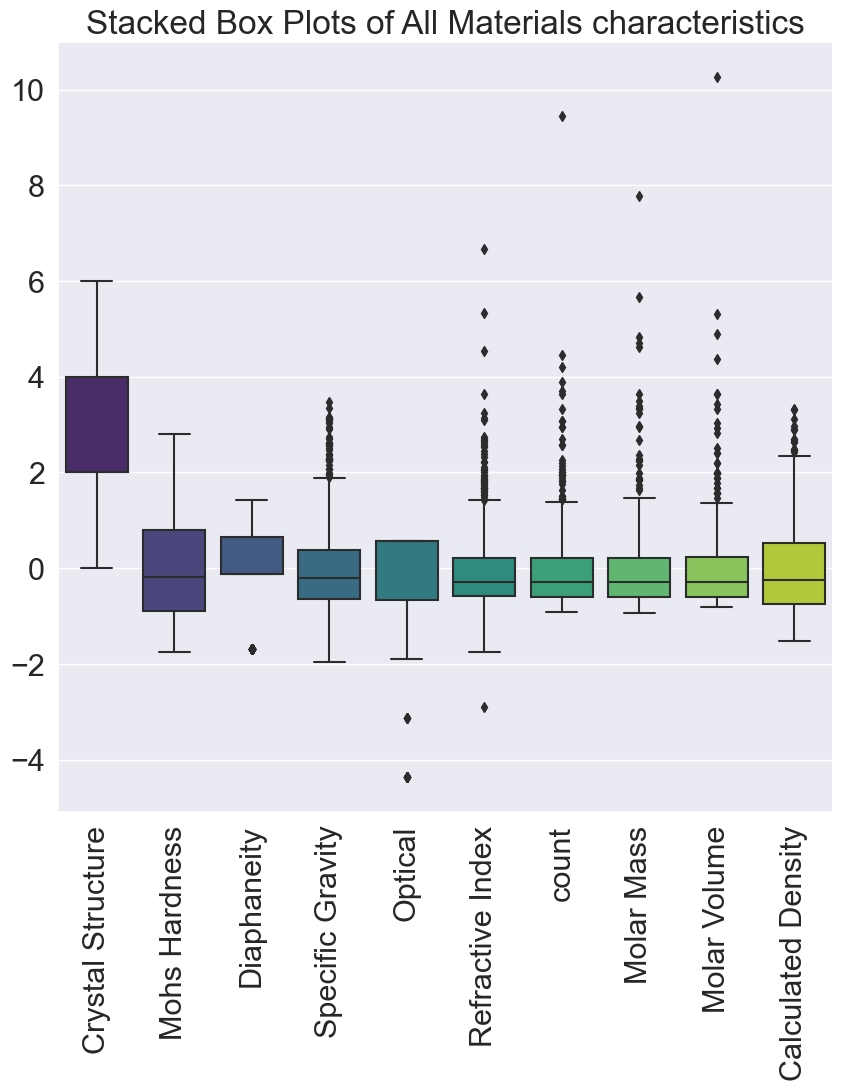

In [61]:
fig, axes = plt.subplots(figsize=(10, 10))
g = sns.boxplot(data=df_features, palette='viridis')
g.set_title('Stacked Box Plots of All Materials characteristics')
plt.xticks(rotation=90)
sns.set(font_scale=2)

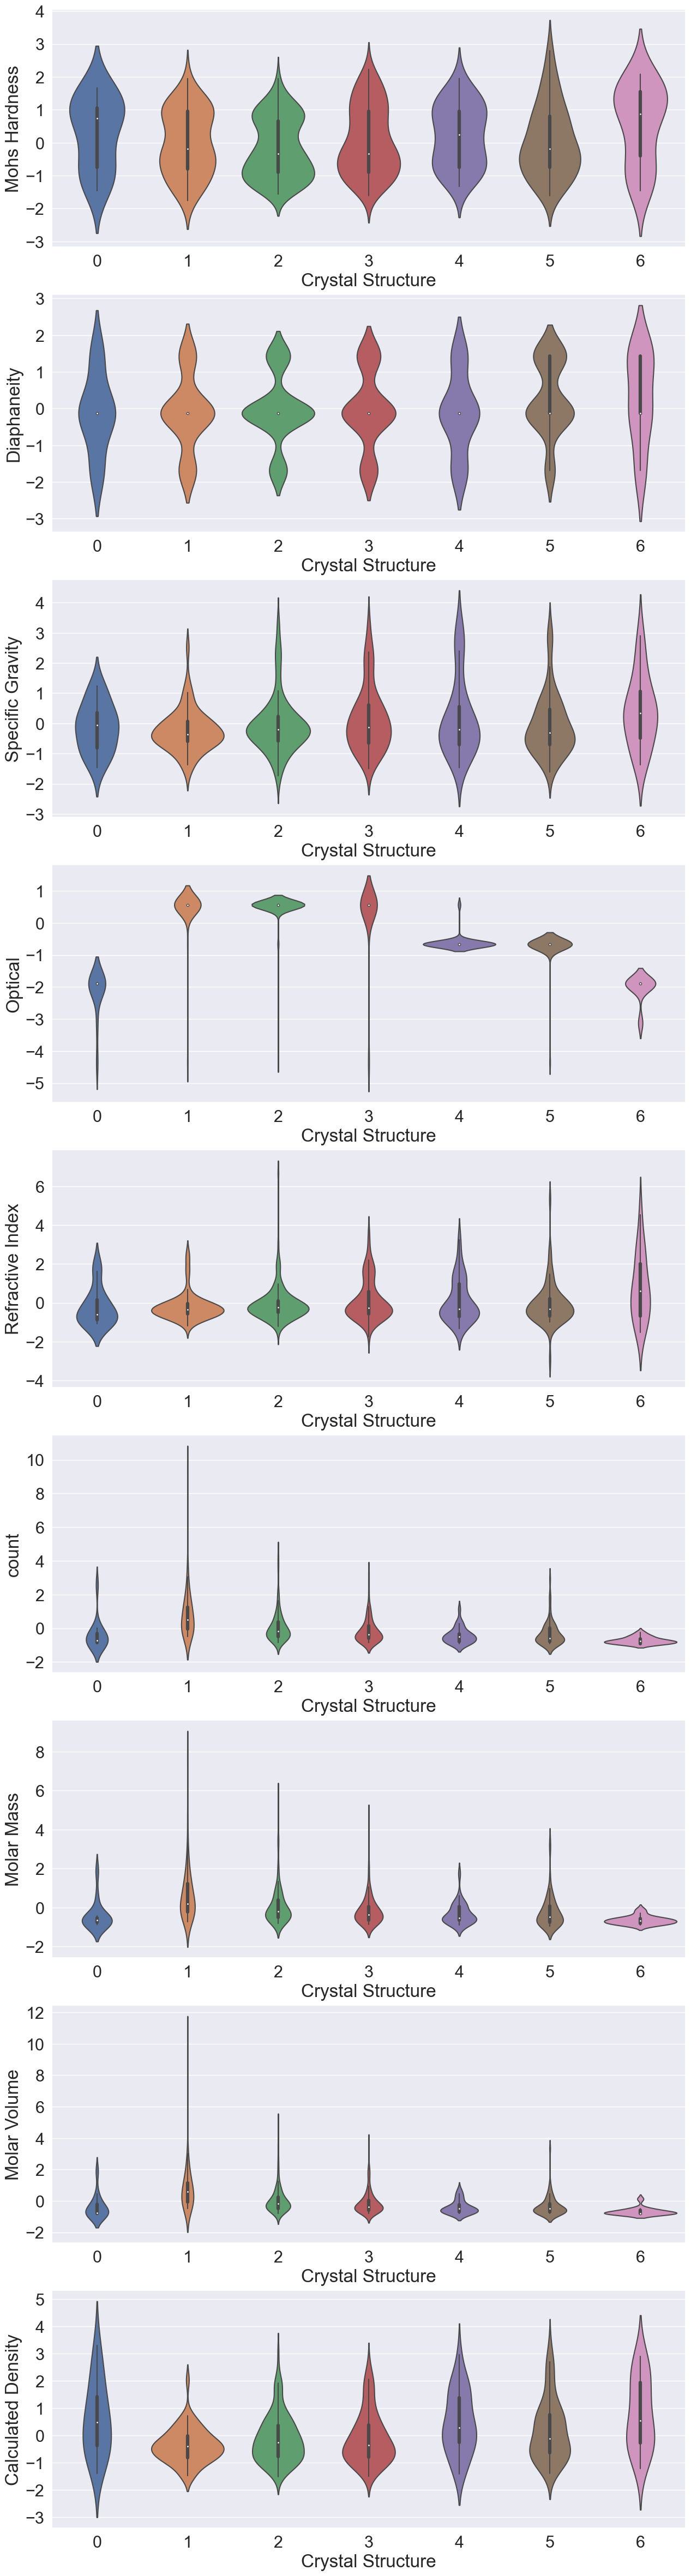

In [62]:
# Create subplots net.
fig, axes = plt.subplots(ncols=1, nrows=9, figsize=(15, 60))

# Fill subplots.
for idx, feature in enumerate(df_features.drop('Crystal Structure', axis=1)):
    g = sns.violinplot(ax=axes[idx], x='Crystal Structure', y=feature,
                    data=df_features)
    plt.sca(axes[idx])
    sns.set(font_scale=1)

In [63]:
df_features.to_csv('df_minerais_ML.csv', index = False)